In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/tsovinarbabakhanyan/Desktop/TunisiaLocalChapter_UEFAEURO2024/Datasets/match_line_ups.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matchid          3364 non-null   int64  
 1   hometeamname     3364 non-null   object 
 2   awayteamname     3364 non-null   object 
 3   ispitch          3364 non-null   bool   
 4   isbench          3364 non-null   bool   
 5   isstaff          3364 non-null   bool   
 6   country          3170 non-null   object 
 7   id               3364 non-null   int64  
 8   officialname     2996 non-null   object 
 9   officialsurname  3234 non-null   object 
 10  shortname        2345 non-null   object 
 11  role             3364 non-null   object 
 12  jerseynumber     2345 non-null   float64
 13  isgoalkeeper     2345 non-null   object 
 14  jerseyname       2345 non-null   object 
 15  iscaptain        2345 non-null   object 
 16  tacticx          2345 non-null   float64
 17  tacticy       

In [4]:
data.shape

(3364, 20)

In [5]:
data.describe()

,matchid,id,jerseynumber,tacticx,tacticy,numorder,isbooked
count,3.364000e+03,3.364000e+03,2345.000000,2345.000000,2345.000000,2345.000000,0.0
mean,2.024466e+06,1.847065e+08,12.997441,495.820043,332.622175,11.995309,NaN
std,1.464137e+01,1.075853e+08,7.381313,316.830699,283.950893,6.632187,NaN
min,2.024441e+06,1.050000e+02,1.000000,0.000000,0.000000,1.000000,NaN
25%,2.024453e+06,5.001816e+07,7.000000,321.000000,0.000000,6.000000,NaN
50%,2.024466e+06,2.500429e+08,13.000000,497.000000,373.000000,12.000000,NaN
75%,2.024478e+06,2.500793e+08,19.000000,674.000000,538.000000,18.000000,NaN
max,2.024491e+06,2.501560e+08,26.000000,1000.000000,911.000000,23.000000,NaN


In [6]:
data.columns.tolist()

['matchid',
 'hometeamname',
 'awayteamname',
 'ispitch',
 'isbench',
 'isstaff',
 'country',
 'id',
 'officialname',
 'officialsurname',
 'shortname',
 'role',
 'jerseynumber',
 'isgoalkeeper',
 'jerseyname',
 'iscaptain',
 'tacticx',
 'tacticy',
 'numorder',
 'isbooked']

In [7]:
data.isna().sum()

matchid               0
hometeamname          0
awayteamname          0
ispitch               0
isbench               0
isstaff               0
country             194
id                    0
officialname        368
officialsurname     130
shortname          1019
role                  0
jerseynumber       1019
isgoalkeeper       1019
jerseyname         1019
iscaptain          1019
tacticx            1019
tacticy            1019
numorder           1019
isbooked           3364
dtype: int64

In [8]:
data.nunique()

matchid             51
hometeamname        24
awayteamname        24
ispitch              2
isbench              2
isstaff              2
country             28
id                 881
officialname       524
officialsurname    817
shortname          606
role                20
jerseynumber        26
isgoalkeeper         2
jerseyname         604
iscaptain            2
tacticx            539
tacticy            633
numorder            23
isbooked             0
dtype: int64

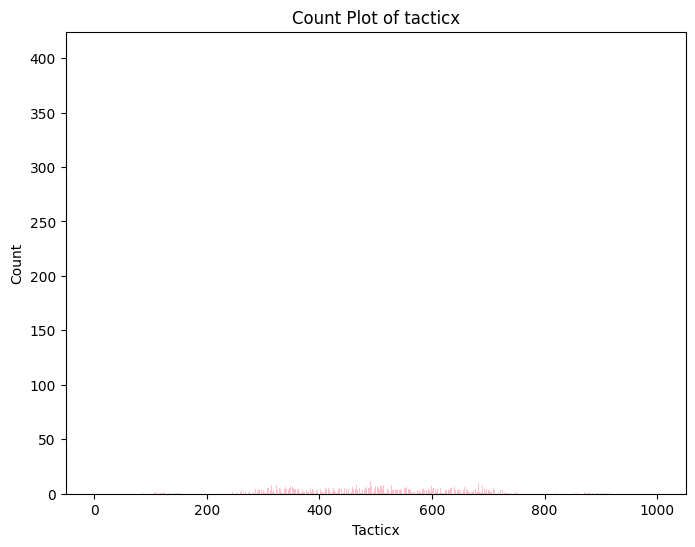

In [9]:
# Assuming 'data' is your DataFrame 
tacticx_counts = data['tacticx'].value_counts() 
  
# Using Matplotlib to create a count plot 
plt.figure(figsize=(8, 6)) 
plt.bar(tacticx_counts.index, tacticx_counts, color='pink') 
plt.title('Count Plot of tacticx') 
plt.xlabel('Tacticx') 
plt.ylabel('Count') 
plt.show() 

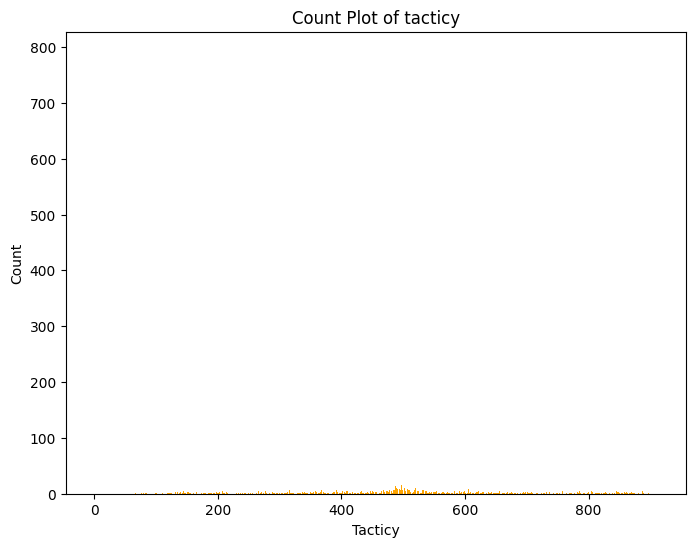

In [10]:
# Assuming 'data' is your DataFrame 
tacticy_counts = data['tacticy'].value_counts() 
  
# Using Matplotlib to create a count plot 
plt.figure(figsize=(8, 6)) 
plt.bar(tacticy_counts.index, tacticy_counts, color='orange') 
plt.title('Count Plot of tacticy') 
plt.xlabel('Tacticy') 
plt.ylabel('Count') 
plt.show() 

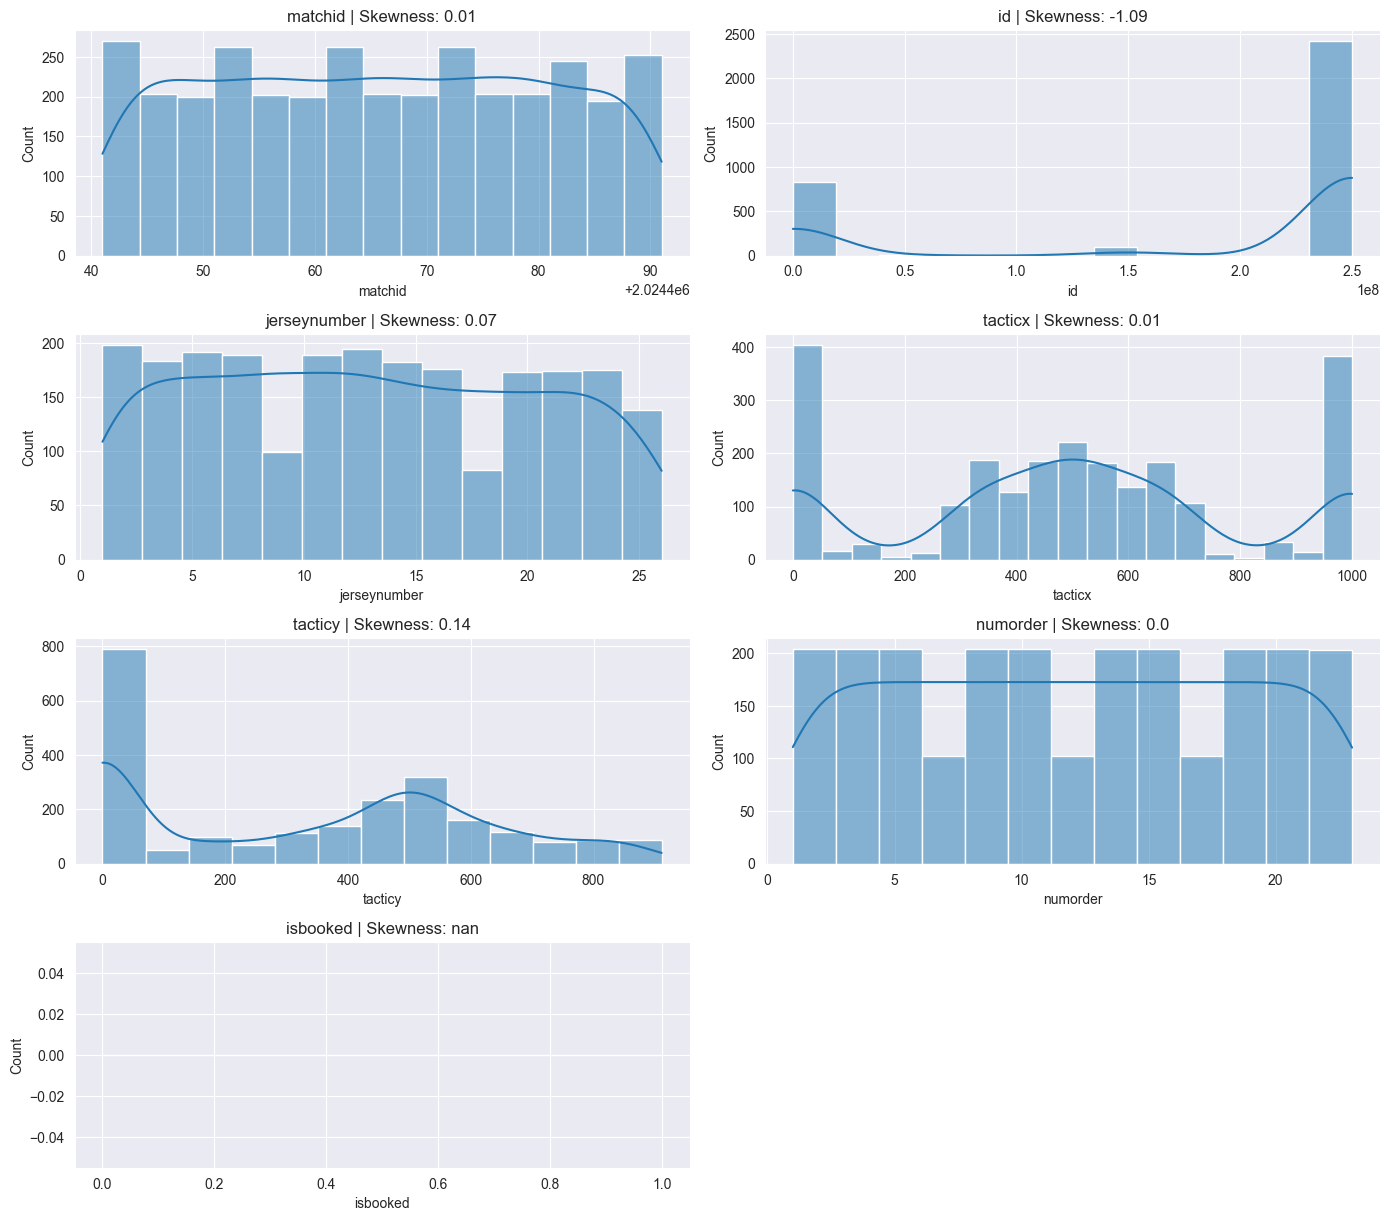

In [11]:
# Set Seaborn style 
sns.set_style("darkgrid") 
  
# Identify numerical columns 
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns 
  
# Plot distribution of each numerical feature 
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
    plt.subplot(len(numerical_columns), 2, idx) 
    sns.histplot(data[feature], kde=True) 
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}") 
  
# Adjust layout and show plots 
plt.tight_layout() 
plt.show() 

/var/folders/6q/9ksrs3s519d5p52hth7ky4sc0000gn/T/ipykernel_30774/666911592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="tacticx", y="tacticy", data=data, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3398: UserWarning: 99.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot

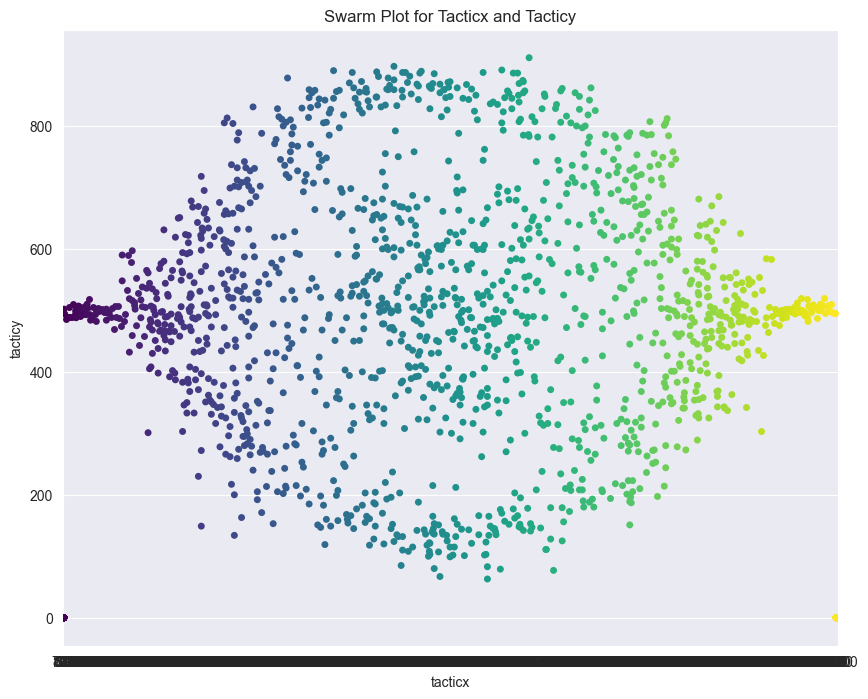

In [12]:
# Assuming 'data' is your DataFrame 
plt.figure(figsize=(10, 8)) 
  
# Using Seaborn to create a swarm plot 
sns.swarmplot(x="tacticx", y="tacticy", data=data, palette='viridis') 
  
plt.title('Swarm Plot for Tacticx and Tacticy') 
plt.xlabel('tacticx') 
plt.ylabel('tacticy') 
plt.show() 

<Figure size 1000x600 with 0 Axes>

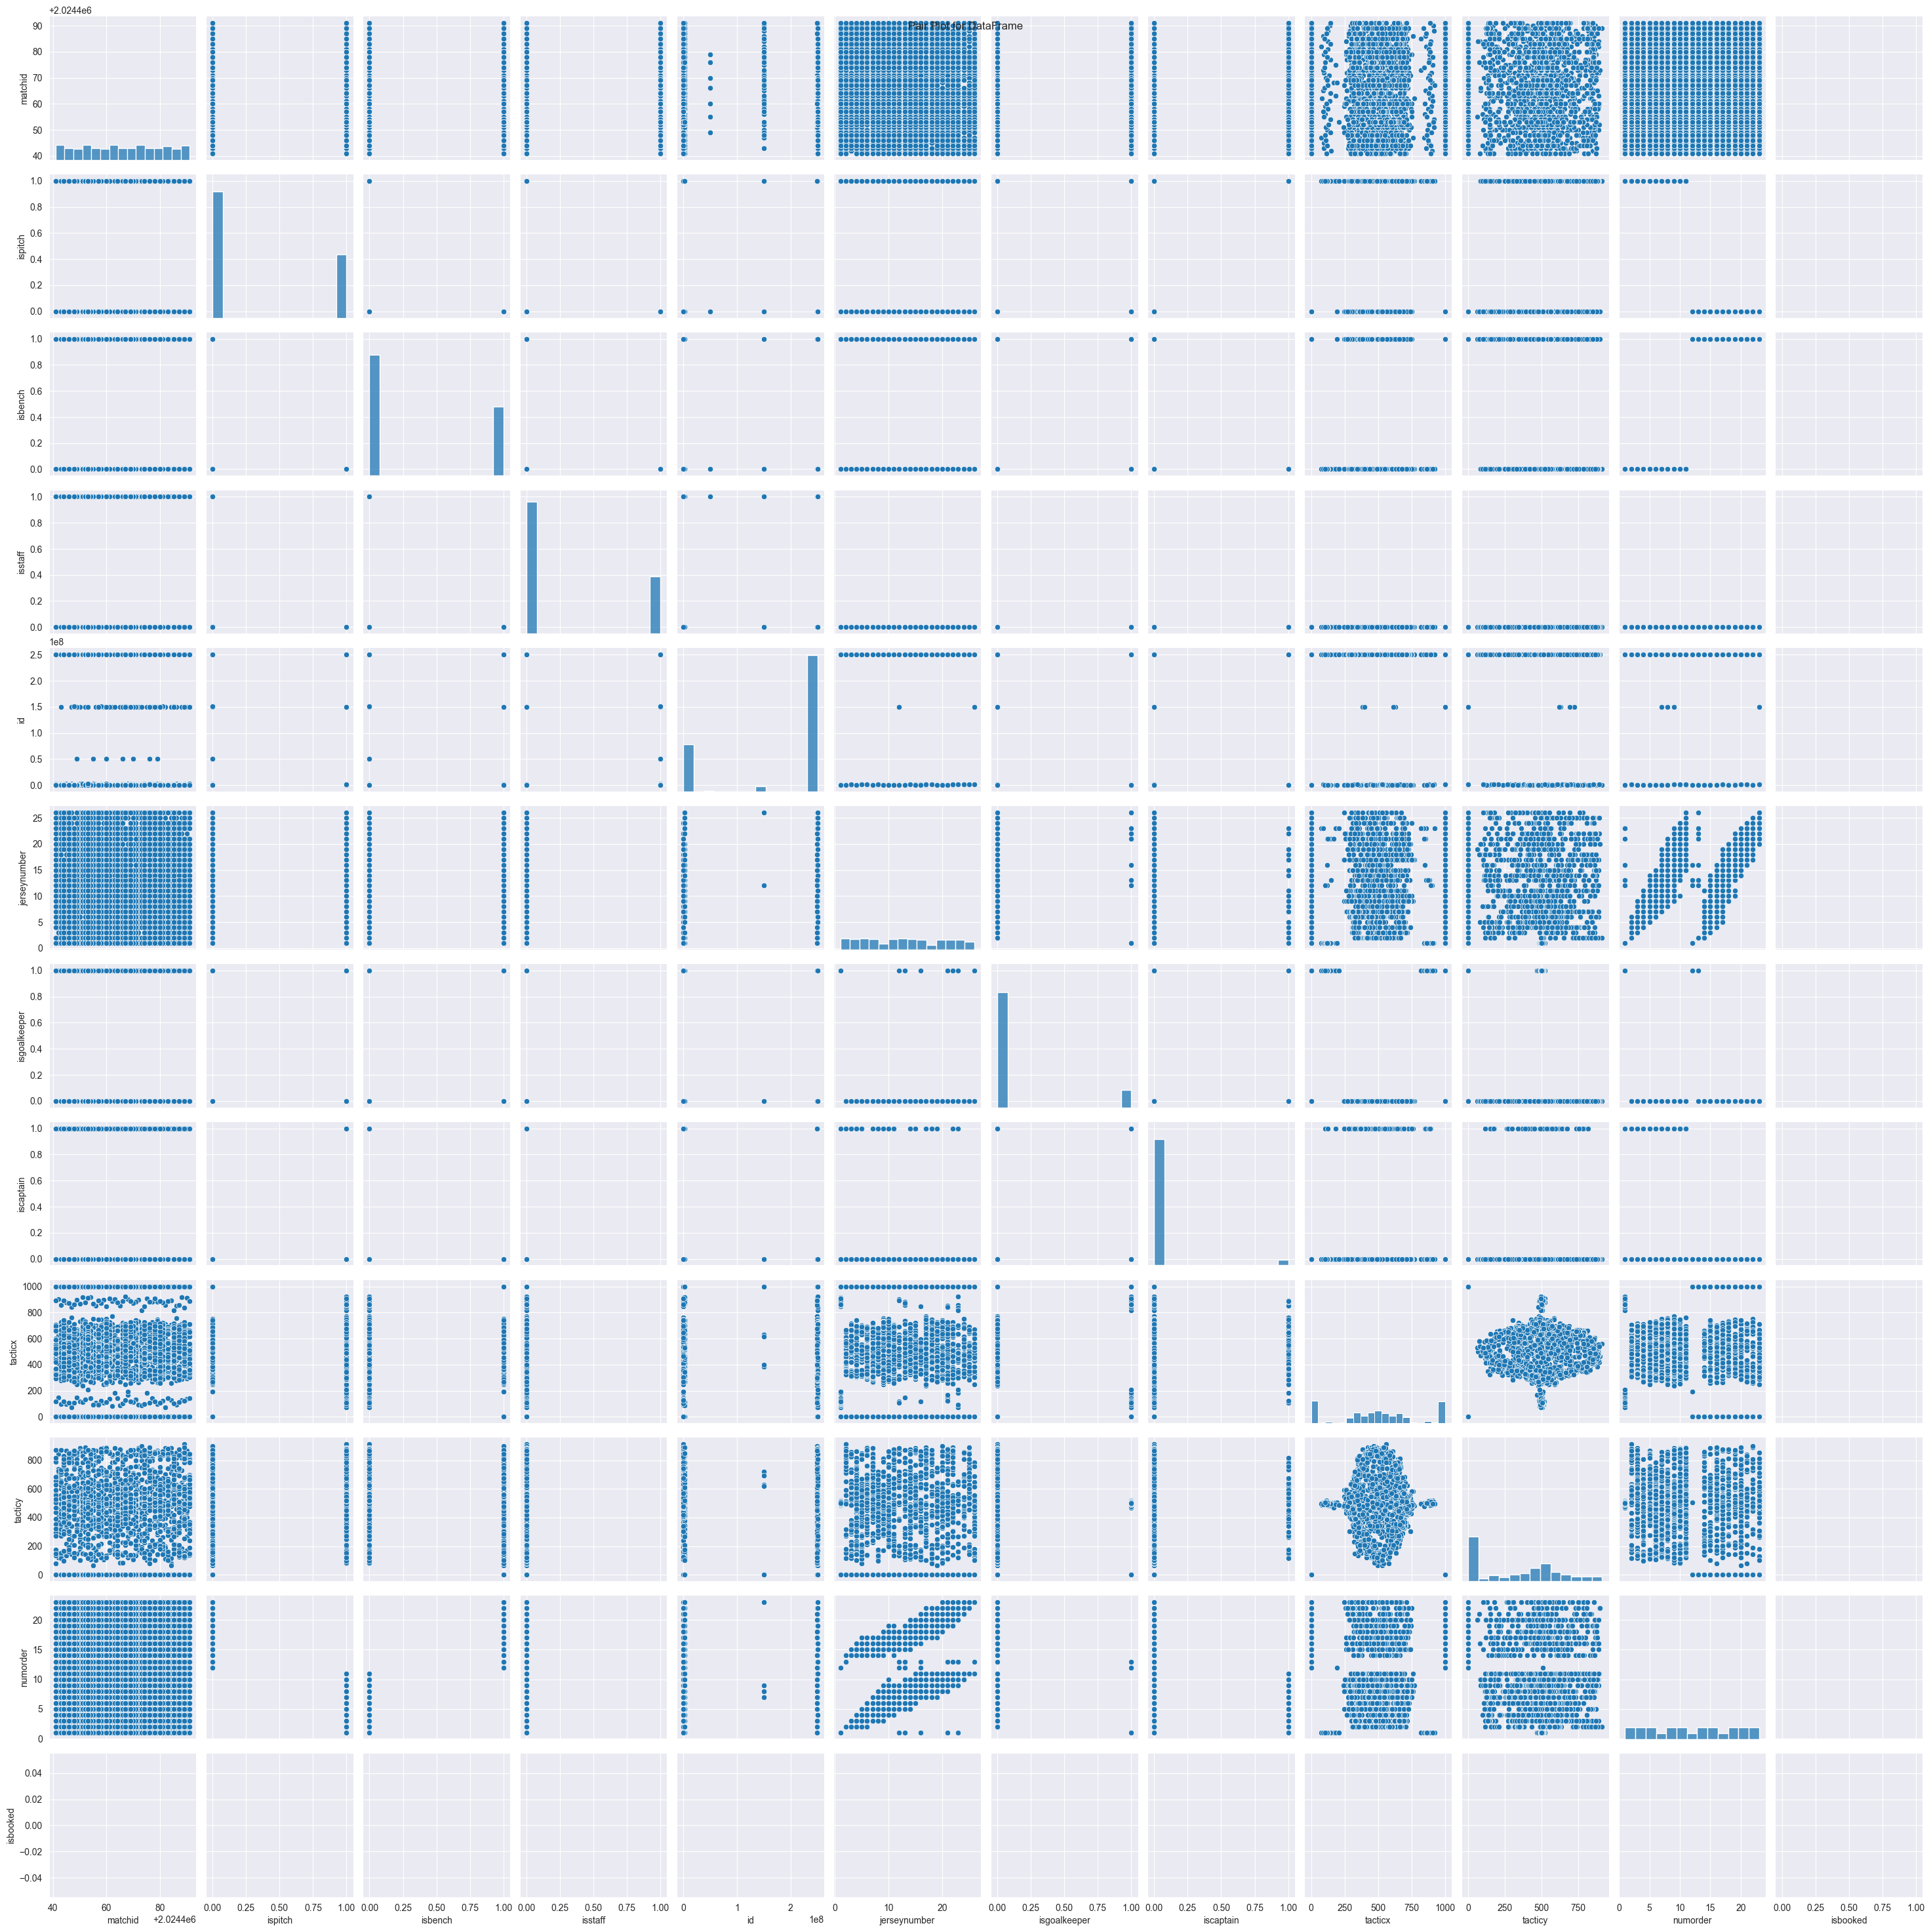

In [13]:
# Assuming 'data' is your DataFrame 
plt.figure(figsize=(10, 6)) 
  
# Using Seaborn to create a pair plot with the specified color palette 
sns.pairplot(data) 
  
plt.suptitle('Pair Plot for DataFrame') 
plt.show() 

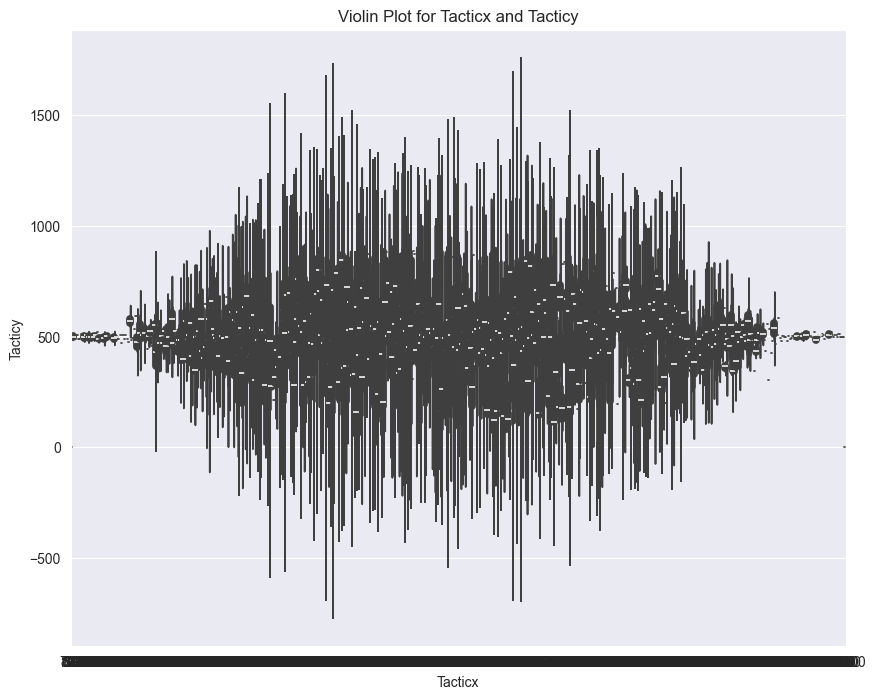

In [14]:
# Assuming 'data' is your DataFrame 
data['country'] = data['country'].astype(str)  # Convert 'quality' to categorical 
  
plt.figure(figsize=(10, 8)) 
  
# Using Seaborn to create a violin plot 
sns.violinplot(x="tacticx", y="tacticy",data=data)
plt.title('Violin Plot for Tacticx and Tacticy') 
plt.xlabel('Tacticx') 
plt.ylabel('Tacticy') 
plt.show() 

<Axes: xlabel='tacticx', ylabel='tacticy'>

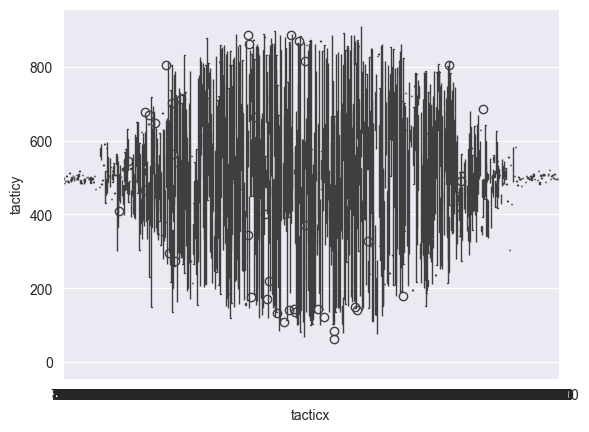

In [15]:
sns.boxplot(x='tacticx',y='tacticy',data=data)

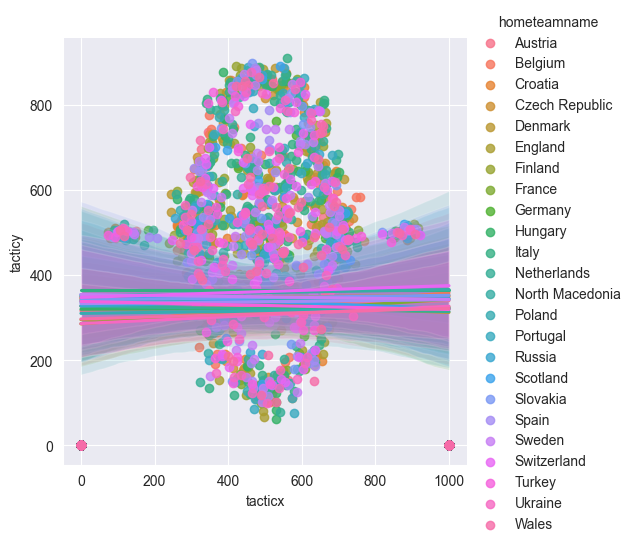

In [16]:
sns.lmplot(data=data, x="tacticx", y="tacticy",hue='hometeamname')

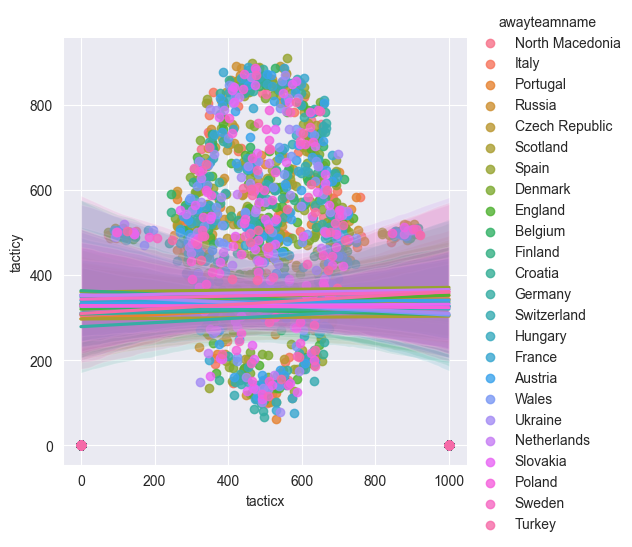

In [17]:
sns.lmplot(data=data, x="tacticx", y="tacticy",hue='awayteamname')

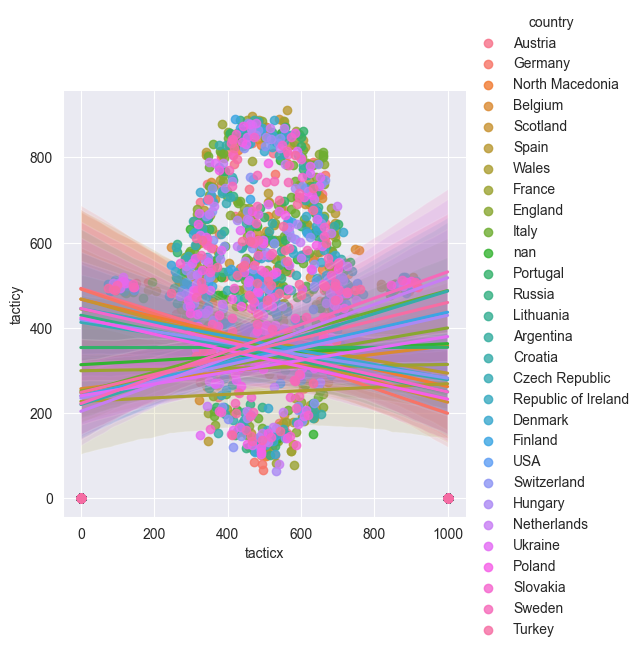

In [18]:
sns.lmplot(data=data, x="tacticx", y="tacticy",hue='country')

In [19]:
data1 = data[['tacticx','tacticy','jerseynumber','numorder']]

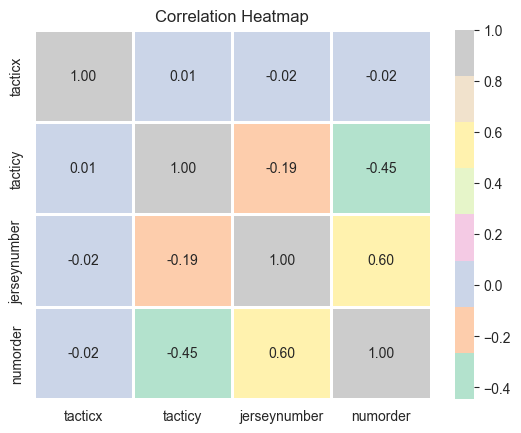

In [20]:
sns.heatmap(data1.corr(),annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap') 
plt.show() 

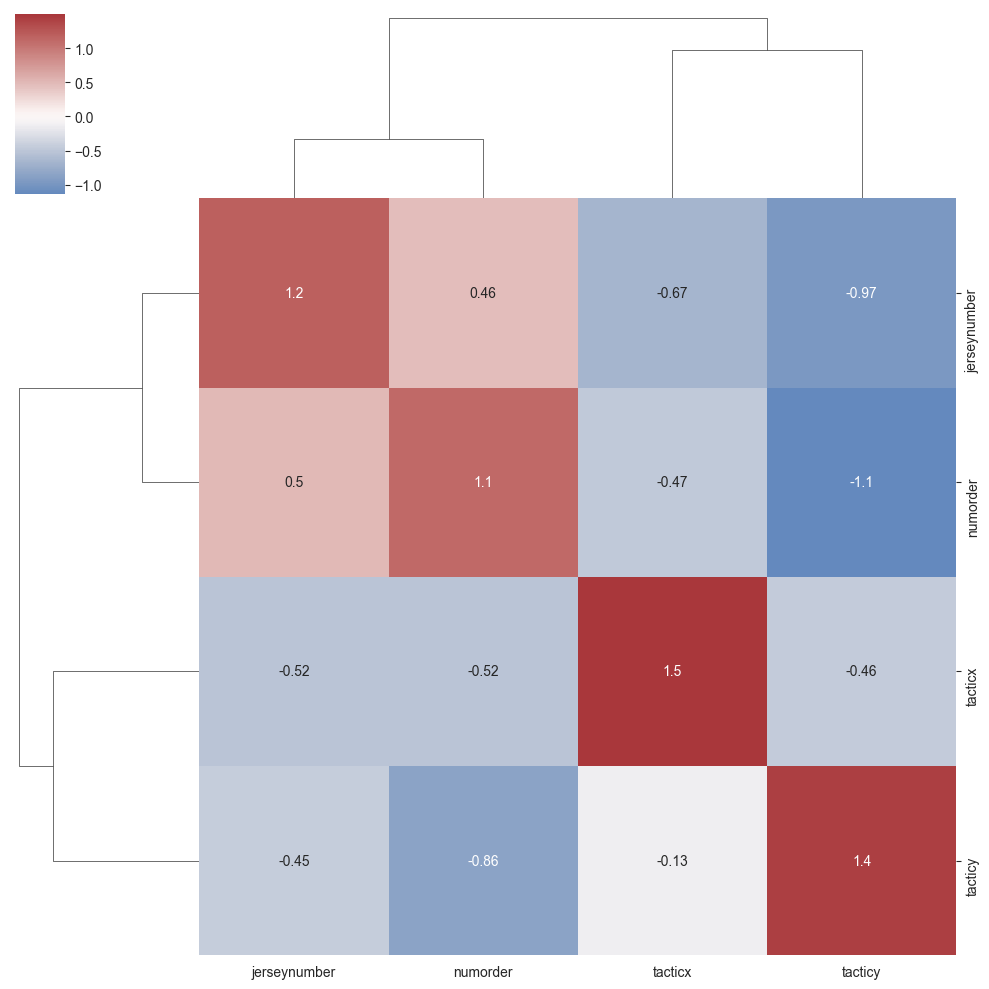

In [21]:
sns.clustermap(data=data1.corr(),z_score=0, cmap="vlag", center=0,annot=True)

<Axes: >

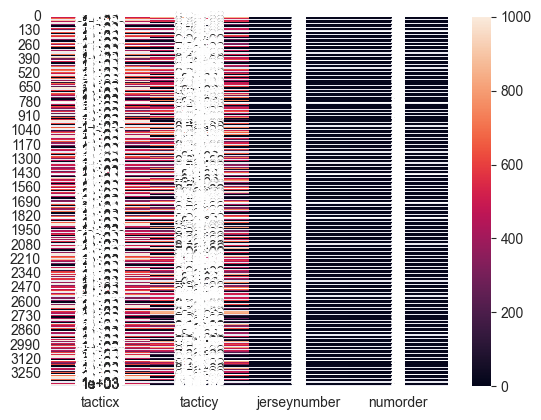

In [24]:
sns.heatmap(data=data1,annot=True)

<Axes: ylabel='Proportion'>

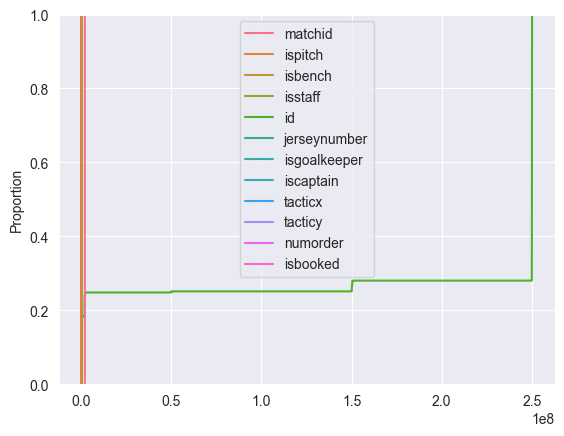

In [26]:
sns.ecdfplot(data=data)